In [3]:
# required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


from sklearn.model_selection import train_test_split

In [4]:
labels_df = pd.read_csv(r'D:\Number_recognition_project\utils\image_labels.csv')

In [5]:
# Define the path to the images
image_folder = r'D:\Number_recognition_project\utils\word_images'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through the DataFrame and load each image
for index, row in labels_df.iterrows():
    img_path = os.path.join(image_folder, row['filename'])
    
    # Load the image (grayscale)
    img = load_img(img_path, color_mode='grayscale', target_size=(160,40)) # Change target_size as needed
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize the image (optional)
    #img_array = img_array / 255.0
    
    # Append the image and label to the lists
    images.append(img_array)
    labels.append(row['label'])



In [6]:
labels_df.shape

(60000, 2)

In [7]:
# 2. Preprocess Data:
images = np.array(images)
images = images.astype('float32') / 255.0  # Normalize pixel values

In [8]:
# Assuming 'label' column in labels_df contains string labels
label_to_index = {label: i for i, label in enumerate(set(labels))}
numerical_labels = [label_to_index[label] for label in labels]
categorical_labels = to_categorical(numerical_labels)

In [9]:
# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

In [10]:
X = images
y = categorical_labels

In [11]:
print(X.shape)
print(y.shape)

(60000, 160, 40, 1)
(60000, 100)


In [12]:
# Shuffle the dataset
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
import tensorflow as tf

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    fill_mode="nearest"
)

model = tf.keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(160,40,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(100, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 158, 38, 32)       320       
                                                                 
 batch_normalization_8 (Bat  (None, 158, 38, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 79, 19, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 79, 19, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 77, 17, 64)        18496     
                                                                 
 batch_normalization_9 (Bat  (None, 77, 17, 64)       

In [19]:
# Fit the model using the augmented data generator
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=50,
                    verbose=1)


Epoch 1/50
1500/1500 [==============================] - 552s 366ms/step - loss: 4.8594 - accuracy: 0.0132 - val_loss: 4.5706 - val_accuracy: 0.0187
Epoch 2/50
1500/1500 [==============================] - 545s 363ms/step - loss: 4.5989 - accuracy: 0.0153 - val_loss: 4.7480 - val_accuracy: 0.0169
Epoch 3/50
1500/1500 [==============================] - 555s 370ms/step - loss: 4.5135 - accuracy: 0.0182 - val_loss: 5.8560 - val_accuracy: 0.0103
Epoch 4/50
1500/1500 [==============================] - 553s 369ms/step - loss: 4.4639 - accuracy: 0.0207 - val_loss: 5.0264 - val_accuracy: 0.0113
Epoch 5/50
1500/1500 [==============================] - 650s 433ms/step - loss: 4.4293 - accuracy: 0.0230 - val_loss: 5.3281 - val_accuracy: 0.0112
Epoch 6/50
1500/1500 [==============================] - 560s 373ms/step - loss: 4.4067 - accuracy: 0.0245 - val_loss: 4.3144 - val_accuracy: 0.0327
Epoch 7/50
1500/1500 [==============================] - 562s 375ms/step - loss: 4.3844 - accuracy: 0.0269 - val_

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Evaluate the enhanced model
model.evaluate(X_test, y_test, verbose=1)

375/375 [==============================] - 34s 89ms/step - loss: 4.3646 - accuracy: 0.0534
Test Loss: 4.364601135253906, Test Accuracy: 0.0534166656434536
375/375 [==============================] - 31s 82ms/step - loss: 4.3646 - accuracy: 0.0534


[4.364601135253906, 0.0534166656434536]

In [21]:
model.save('number_recognition_cnn.h5')

d:\Projects\mlproject\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


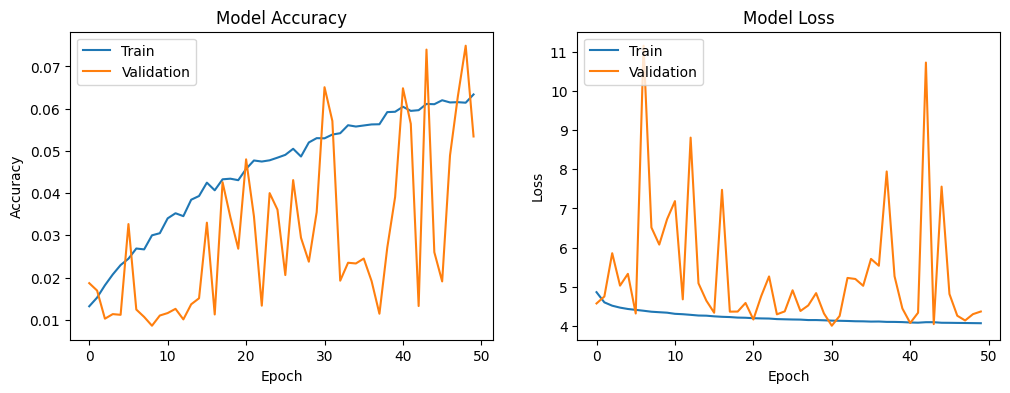

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.regularizers import l2

#model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:], kernel_regularizer=l2(0.01)))


# 1. Define the Model
model = Sequential()

# 2. Add Convolutional and Pooling Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:], kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # Added Batch Normalization

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # Added Batch Normalization

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # Added Batch Normalization

# 3. Flatten the Output
model.add(Flatten())

# 4. Add Dense Layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # Added Dropout for Regularization

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Added Dropout for Regularization

# 5. Output Layer
model.add(Dense(100, activation='softmax'))  # Assuming 100 classes

# 6. Compile the Model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# 7. Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# 8. Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.0122 - loss: 4.9681 - val_accuracy: 0.0100 - val_loss: 4.6007
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.0180 - loss: 4.5587 - val_accuracy: 0.0122 - val_loss: 4.6057
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.0216 - loss: 4.4312 - val_accuracy: 0.0152 - val_loss: 4.4745
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.0234 - loss: 4.3332 - val_accuracy: 0.0165 - val_loss: 4.5395
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0245 - loss: 4.2437 - val_accuracy: 0.0107 - val_loss: 4.4909
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.0294 - loss: 4.1699 - val_accuracy: 0.0117 - val_loss: 8.0065
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0349 - loss: 4.0833 - val_accuracy: 0.0113 - val_loss: 7.1470
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.0365 - loss: 4.031

NameError: name 'history' is not defined

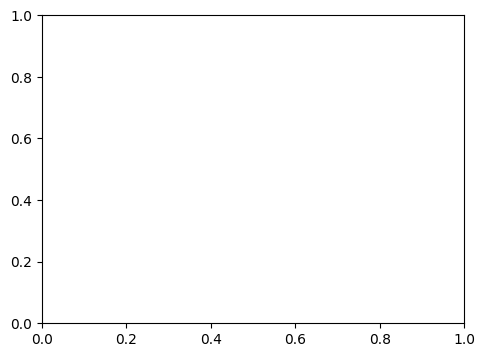

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = VGG16(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])
base_model.trainable = False  # Freeze the base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))


ValueError: The input must have 3 channels; Received `input_shape=(40, 160, 1)`

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 38, 158, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 19, 79, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 19, 79, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 77, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 38, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 38, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 36, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 18, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 18, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6912)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,769,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,726,382 (21.84 MB)

 Trainable params: 1,908,644 (7.28 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 3,817,290 (14.56 MB)

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 179ms/step - accuracy: 0.0096 - loss: 4.6064 - val_accuracy: 0.0039 - val_loss: 4.6067
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 179ms/step - accuracy: 0.0083 - loss: 4.6054 - val_accuracy: 0.0039 - val_loss: 4.6080
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 42s 184ms/step - accuracy: 0.0091 - loss: 4.6051 - val_accuracy: 0.0039 - val_loss: 4.6092
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 77s 161ms/step - accuracy: 0.0117 - loss: 4.6047 - val_accuracy: 0.0039 - val_loss: 4.6102
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 161ms/step - accuracy: 0.0105 - loss: 4.6041 - val_accuracy: 0.0039 - val_loss: 4.6112
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 36s 162ms/step - accuracy: 0.0109 - loss: 4.6044 - val_accuracy: 0.0039 - val_loss: 4.6120
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.0129 - loss: 4.6044 - val_accuracy: 0.0039 - val_loss: 4.6129
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.0120 - loss: 4

In [ ]:
# 7. Evaluate Model:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.0058 - loss: 4.6147
Test Loss: 4.614709854125977, Test Accuracy: 0.003888888983055949


In [ ]:


# Assuming 'label' column in labels_df contains string labels
label_to_index = {label: i for i, label in enumerate(set(labels))}
numerical_labels = [label_to_index[label] for label in labels]
categorical_labels = to_categorical(numerical_labels)

# 3. Split Data:
X_train, X_test, y_train, y_test = train_test_split(
    images, categorical_labels, test_size=0.2, random_state=42
)

# 4. Build CNN Model:
model = Sequential()
# Add convolutional layers, pooling layers, etc. (customize as needed)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
# ... more layers
model.add(Flatten())
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer

# 5. Compile Model:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 6. Train Model:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 7. Evaluate Model:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

In [ ]:
# Define the path to the images
image_folder = '/content/drive/MyDrive/Grey_images/word_images_zip'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through the DataFrame and load each image
for index, row in labels_df.iterrows():
    img_path = os.path.join(image_folder, row['filename'])

    # Load the image (grayscale)
    img = load_img(img_path, color_mode='grayscale', target_size=(160,40)) # Change target_size as needed

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Append the image and label to the lists
    images.append(img_array)
    labels.append(row['label'])

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

KeyboardInterrupt: 

In [ ]:
X.shape
y.shape